# Solar Models in Comparison

Creates Figures 6.2 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge 
University Press.

Plot of pressure and temperature as a function of radius for three comparative solar models: 
uniform-density, $n=3$ polytrope, and the BP04 standard solar model.  

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig6_2.png' 

# graphic aspect ratio = width/height

aspect = 2.4

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Model Data

Two data files:
 * `BP2004_Standard.txt` - the BP2004 standard solar interior model
 * `Sun_models.txt` - the "sun" modeled two ways: uniform-density and $n=3$ polytrope
 
We precompute the comparison models because coding them in here is not enlightening.  The files
are found in the `ModelSun/` folder.

### BP04 Solar Model

Data file has a header, thermodynamic units are cgs, R, M, and L scaled to solar.  Convert pressure in dyne cm$^{-2}$ to atmospheres (1 atm = $1.01325\times10^6$ dyne cm$^{-2}$).

In [3]:
dataDir = 'ModelSun'

bp04File = f'{dataDir}/BP2004_Standard.txt'

data = pd.read_csv(bp04File,sep=r'\s+',comment='#')
bpR = np.array(data['R/Rsun'])
bpT = np.array(data['T'])
bpP = np.array(data['P'])/1.01325e6 # convert to atmospheres          


### Uniform-density & n=3 Polytrope models

Pre-computed uniform-density and polytrope models scaled to teh Sun.  The file has a header, units are cgs, pressure in atmospheres.

In [4]:
modelFile = f'{dataDir}/Sun_models.txt'

data = pd.read_csv(modelFile,sep=r'\s+',comment='#')

modR = np.array(data['R/Rsun']) # common radii for both models

uniP = np.array(data['uniP'])
uniT = np.array(data['uniT'])

polyP = np.array(data['polyP'])
polyT = np.array(data['polyT'])

### Figure 6.2 - Pressure and Temperature vs. Radius

Linear in solar radius, log10 in pressure and temperature.  Left: pressure, Right: temperature

Lines
 * solid - BP2004 standard solar model
 * dotted - n=3 polytrope Sun
 * dashed - uniform density Sun

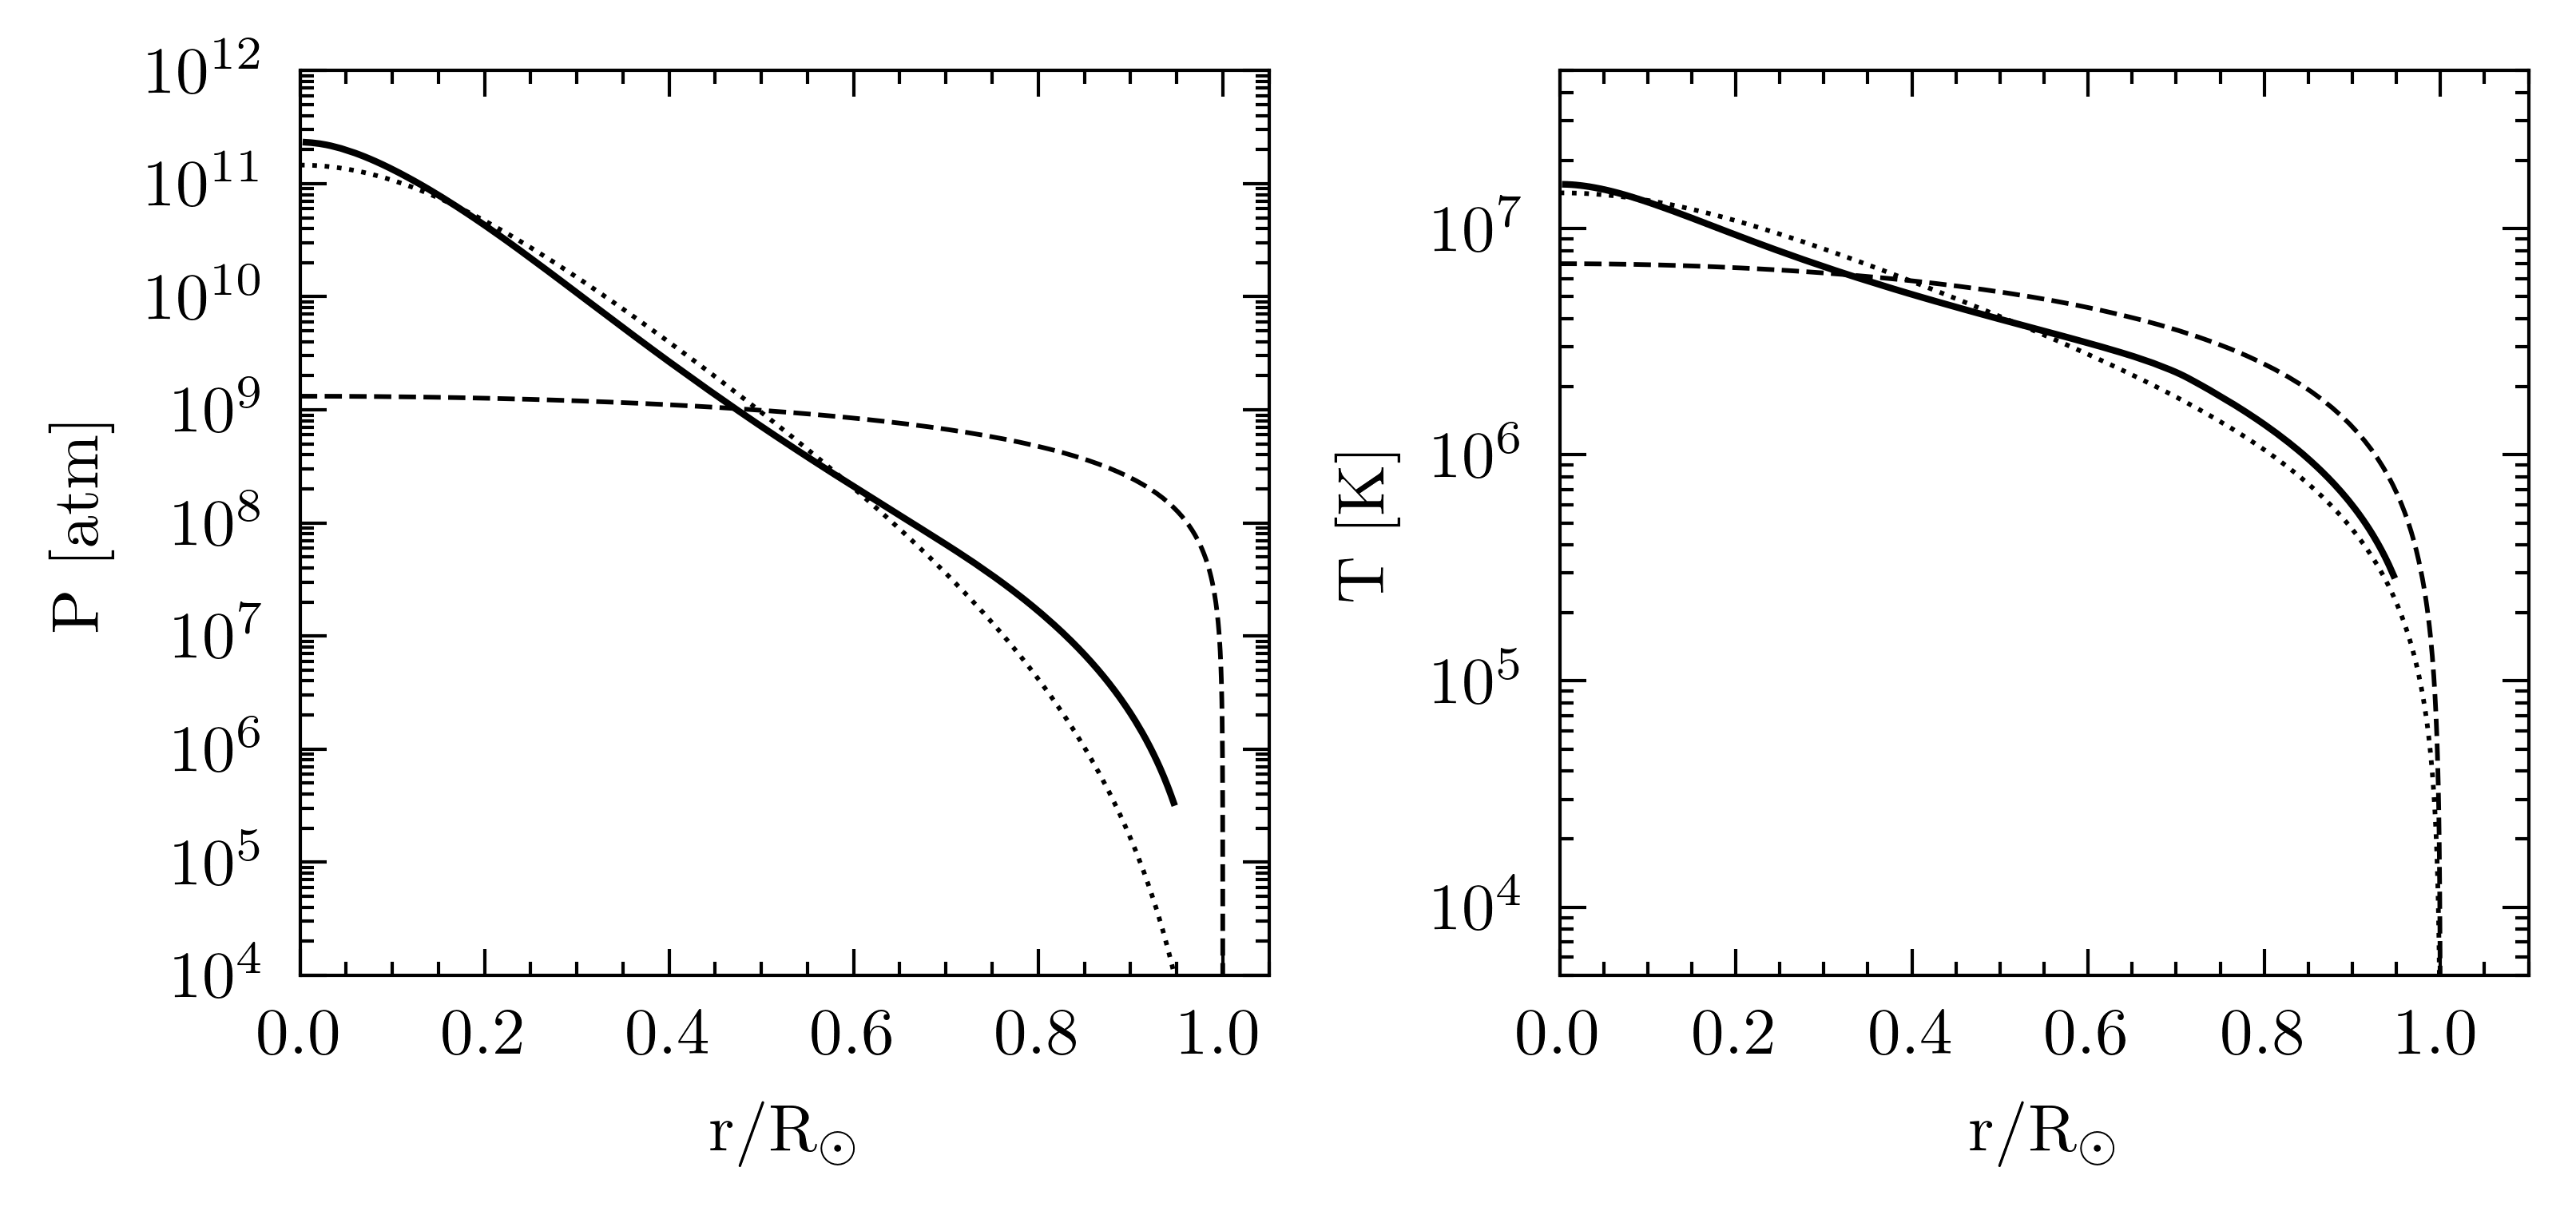

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.3, hspace=0)

# Left Panel: P vs R

rMin = 0.0
rMax = 1.05
pMin = 1.0e4
pMax = 1.0e12

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(rMin,rMax)
ax1.set_xlabel(r'r/R$_{\odot}$',fontsize=axisFontSize)
ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1.set_ylim(pMin,pMax)
ax1.set_ylabel(r'P [atm]',fontsize=axisFontSize)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.set_yticks([1.0e4,1.0e5,1.0e6,1.0e7,1.0e8,1.0e9,1.0e10,1.0e11,1.0e12])

ax1.plot(bpR,bpP,'-',color='black',lw=1.0,zorder=10)
ax1.plot(modR,uniP,'--',color='black',lw=0.7,zorder=10)
ax1.plot(modR,polyP,':',color='black',lw=0.7,zorder=10)

# Right Panel: T vs R

rMin = 0
rMax = 1.1
tMin = 5.0e3
tMax = 5.0e7

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(rMin,rMax)
ax2.set_xlabel(r'r/R$_\odot$',fontsize=axisFontSize)
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylim(tMin,tMax)
ax2.set_ylabel(r'T [K]',fontsize=axisFontSize)
ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.set_yticks([1.0e4,1.0e5,1.0e6,1.0e7])

ax2.plot(bpR,bpT,'-',color='black',lw=1.0,zorder=10)
ax2.plot(modR,uniT,'--',color='black',lw=0.7,zorder=10)
ax2.plot(modR,polyT,':',color='black',lw=0.7,zorder=10)
    
# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')